# Visualizing Chipotle's Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from collections import Counter

# set this so the 
#%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

In [2]:
address = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

### Step 3. Assign it to a variable called chipo.

In [3]:
chipo = pd.read_csv(address, sep = '\t')
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


### Step 4. See the first 10 entries

In [4]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

Help on method hist_series in module pandas.plotting._core:

hist_series(by=None, ax=None, grid=True, xlabelsize=None, xrot=None, ylabelsize=None, yrot=None, figsize=None, bins=10, **kwds) method of pandas.core.series.Series instance
    Draw histogram of the input series using matplotlib.
    
    Parameters
    ----------
    by : object, optional
        If passed, then used to form histograms for separate groups
    ax : matplotlib axis object
        If not passed, uses gca()
    grid : bool, default True
        Whether to show axis grid lines
    xlabelsize : int, default None
        If specified changes the x-axis label size
    xrot : float, default None
        rotation of x axis labels
    ylabelsize : int, default None
        If specified changes the y-axis label size
    yrot : float, default None
        rotation of y axis labels
    figsize : tuple, default None
        figure size in inches by default
    bins : integer or sequence, default 10
        Number of histog

In [40]:
df = pd.DataFrame(
    np.random.randint(1, 7, 6000),
    columns = ['one'])
df['two'] = df['one'] + np.random.randint(1, 7, 6000)
df

,one,two
0,5,11
1,3,9
2,1,7
3,1,2
4,2,7
...,...,...
5995,5,10
5996,5,6
5997,3,4
5998,4,10


In [6]:
chipo.groupby('item_name')['quantity'].sum().max()

761

In [5]:
chipo8 = (chipo.groupby("item_name").sum()).sort_values("quantity", ascending=False)
chipo8 = chipo8.head()
chipo8 

,order_id,quantity
item_name,,
Chicken Bowl,713926,761
Chicken Burrito,497303,591
Chips and Guacamole,449959,506
Steak Burrito,328437,386
Canned Soft Drink,304753,351


In [6]:
chipo8 = chipo8.drop(['order_id'], axis=1)
chipo8

,quantity
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386
Canned Soft Drink,351


In [46]:
chipo8.index


Index(['Chicken Bowl', 'Chicken Burrito', 'Chips and Guacamole',
       'Steak Burrito', 'Canned Soft Drink'],
      dtype='object', name='item_name')

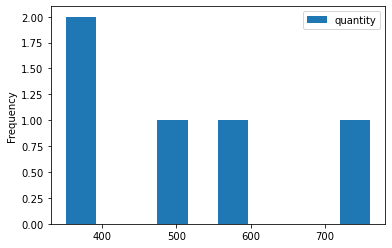

In [9]:
chipo8.plot.hist()

In [ ]:
chipo8.plot.hist(grid=True,)

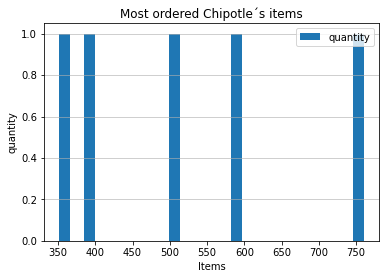

In [19]:

chipo8.plot.hist(by='quantity', bins=25, rwidth=0.9)
plt.title('Most ordered Chipotle´s items')
plt.xlabel('Items')
plt.ylabel('quantity')
plt.grid(axis='y', alpha=0.75)

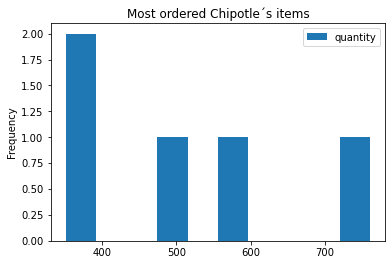

In [69]:
chipo8.plot(kind='hist', use_index= 4,title='Most ordered Chipotle´s items') 

Aqui nos damos cuenta que el histograma no nos indica lo que queremos ver, por lo tanto plotearemos un diagrama de barras 

,order_id,quantity
item_name,,
Chicken Bowl,713926,761
Chicken Burrito,497303,591
Chips and Guacamole,449959,506
Steak Burrito,328437,386
Canned Soft Drink,304753,351


Item_names: ['Chicken Bowl' 'Chicken Burrito' 'Chips and Guacamole' 'Steak Burrito'
 'Canned Soft Drink']
Quantities: [761 591 506 386 351]


{'Chicken Bowl': 761,
 'Chicken Burrito': 591,
 'Chips and Guacamole': 506,
 'Steak Burrito': 386,
 'Canned Soft Drink': 351}

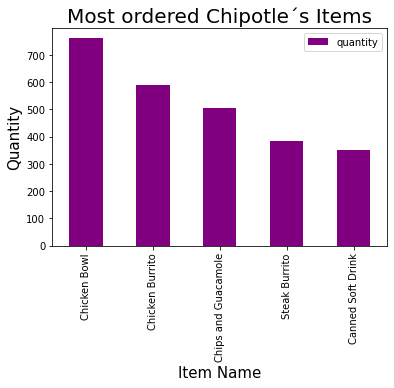

In [27]:
# create the plot
chipo8.plot(kind='bar', color='purple')

# Set the title and labels
plt.xlabel('Item Name',fontsize=15)
plt.ylabel('Quantity',fontsize=15)
plt.title('Most ordered Chipotle´s Items',fontsize=20)

# show the plot
plt.show()

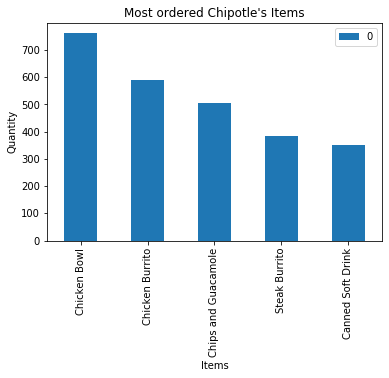

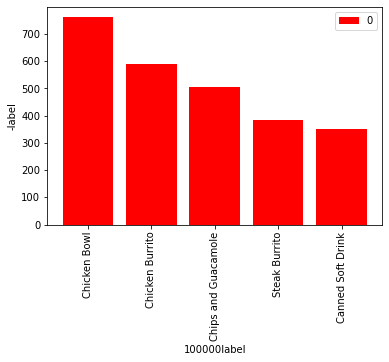

In [32]:
#Otra forma de sacar el diagrama de barras
plt.bar(chipo8.index, chipo8.quantity, label=0, color="red")
plt.legend()
plt.xticks(rotation="vertical")
plt.ylabel("-label")
plt.xlabel("100000label")
plt.show()

In [ ]:
#Un resumen de como crear un diagrama de barras
# get the Series of the names
x = chipo.item_name

# use the Counter class from collections to create a dictionary with keys(text) and frequency
letter_counts = Counter(x)

# convert the dictionary to a DataFrame
df = pd.DataFrame.from_dict(letter_counts, orient='index')

# sort the values from the top to the least value and slice the first 5 items
df = df[0].sort_values(ascending = True)[45:50]

# create the plot
df.plot(kind='bar')

# Set the title and labels
plt.xlabel('Items')
plt.ylabel('Price')
plt.title('Most ordered Chipotle\'s Items')

# show the plot
plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

(0, 40.0)

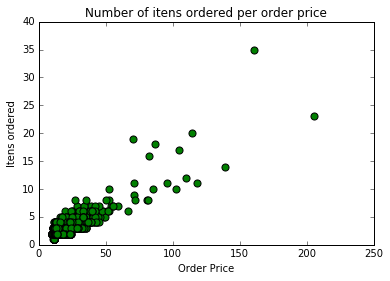

### Step 7. BONUS: Create a question and a graph to answer your own question.